In [1]:
pip install torchtext==0.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1. 훈련 데이터와 테스트 데이터로 분리하기
이번 실습에 사용할 IMDB 리뷰 데이터를 다운로드 받아 이를 훈련 데이터와 테스트 데이터로 분리하여 csv 파일로 저장해두겠습니다.

In [2]:
import urllib.request
import pandas as pd

In [3]:
# 우선 인터넷에서 IMDB 리뷰 데이터를 다운로드 받습니다.
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7f82733d1850>)

In [4]:
# 다운로드한 IMDB 리뷰 데이터를 데이터프레임에 저장하고, 상위 5개의 행만 출력해보겠습니다.
df = pd.read_csv('IMDb_Reviews.csv', encoding='latin1')
df.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [5]:
print('전체 샘플의 개수 : {}'.format(len(df)))

전체 샘플의 개수 : 50000


In [6]:
# 전체 샘플의 개수는 50,000개입니다. 25,000개씩 분리하여 훈련 데이터와 테스트 데이터로 분리해보겠습니다.
train_df = df[:25000]
test_df = df[25000:]

상위 25,000개의 행은 train_df에 하위 25,000개의 행은 test_df에 저장하였습니다. 각각 훈련 데이터와 테스트 데이터입니다. 이 둘을 각각 훈련 데이터는 train_data.csv 파일에 테스트 데이터는 test_data.csv 파일에 저장하겠습니다.



In [7]:
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

### 2. 필드 정의하기(torchtext.data)
torchtext.data에는 필드(Field)라는 도구를 제공합니다. 필드를 통해 앞으로 어떤 전처리를 할 것인지를 정의합니다.

In [8]:
from torchtext import data, datasets

# 필드 정의
TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=str.split,
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   batch_first=False,
                   is_target=True)

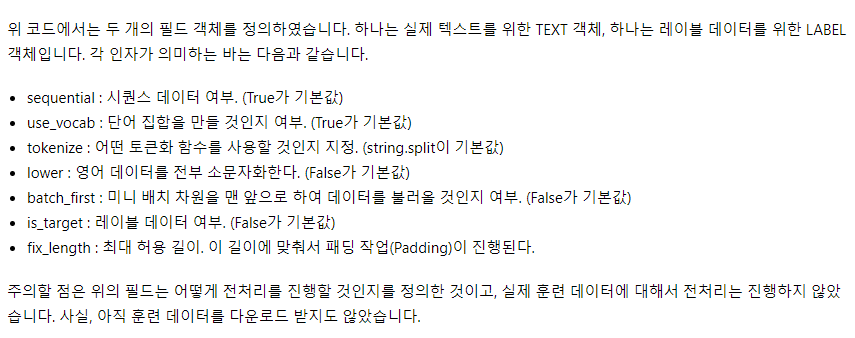

### 3. 데이터셋 만들기

필드를 지정했다면 이제 데이터셋을 만들어야 합니다. TabularDataset은 데이터를 불러오면서 필드에서 정의했던 토큰화 방법으로 토큰화를 수행합니다. 이때, 소문자화 같은 기본적인 전처리도 함께 이루어집니다.

In [9]:
from torchtext.data import TabularDataset

In [10]:
train_data, test_data = TabularDataset.splits(
        path='.', train='train_data.csv', test='test_data.csv', format='csv',
        fields=[('text', TEXT), ('label', LABEL)], skip_header=True)

- path : 파일이 위치한 경로.
- format : 데이터의 포맷.
- fields : 위에서 정의한 필드를 지정. 첫번째 원소는 데이터 셋 내에서 해당 필드를 호칭할 이름, 두번째 원소는 지정할 필드.
- skip_header : 데이터의 첫번째 줄은 무시.

In [11]:
# 훈련 데이터와 테스트 데이터를 csv 파일로 불러와 분리해서 저장해주었는데, 데이터의 크기를 다시 확인해보겠습니다.
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

훈련 샘플의 개수 : 25000
테스트 샘플의 개수 : 25000


In [12]:
# 앞서 확인했던 것과 같이 각각 25,000개의 샘플이 존재합니다. vars()를 통해서 주어진 인덱스의 샘플을 확인할 수 있습니다. 훈련 데이터의 첫번째 샘플을 확인해봅시다.
print(vars(train_data[0]))

{'text': ['my', 'family', 'and', 'i', 'normally', 'do', 'not', 'watch', 'local', 'movies', 'for', 'the', 'simple', 'reason', 'that', 'they', 'are', 'poorly', 'made,', 'they', 'lack', 'the', 'depth,', 'and', 'just', 'not', 'worth', 'our', 'time.<br', '/><br', '/>the', 'trailer', 'of', '"nasaan', 'ka', 'man"', 'caught', 'my', 'attention,', 'my', 'daughter', 'in', "law's", 'and', "daughter's", 'so', 'we', 'took', 'time', 'out', 'to', 'watch', 'it', 'this', 'afternoon.', 'the', 'movie', 'exceeded', 'our', 'expectations.', 'the', 'cinematography', 'was', 'very', 'good,', 'the', 'story', 'beautiful', 'and', 'the', 'acting', 'awesome.', 'jericho', 'rosales', 'was', 'really', 'very', 'good,', "so's", 'claudine', 'barretto.', 'the', 'fact', 'that', 'i', 'despised', 'diether', 'ocampo', 'proves', 'he', 'was', 'effective', 'at', 'his', 'role.', 'i', 'have', 'never', 'been', 'this', 'touched,', 'moved', 'and', 'affected', 'by', 'a', 'local', 'movie', 'before.', 'imagine', 'a', 'cynic', 'like', 'me

앞서 TabularDataset의 fields 인자로 TEXT 필드는 text로 호칭하고, LABEL 필드는 label로 호칭한다고 지정한 바 있습니다. 실제로 위의 코드 결과는 text 필드와 label 필드 두 가지로 구성됩니다. text 필드에 저장된 영화 리뷰를 보면 현재 토큰화가 진행된 것을 확인할 수 있습니다. 아래의 코드로 현재 데이터셋의 필드 구성을 별도 확인할 수 있습니다.

In [13]:
# 필드 구성 확인.
print(train_data.fields.items())

dict_items([('text', <torchtext.data.field.Field object at 0x7f8273191d00>), ('label', <torchtext.data.field.Field object at 0x7f827ad0fa30>)])


### 4. 단어 집합(Vocabulary) 만들기
토큰화 전처리를 끝냈다면, 이제 각 단어에 고유한 정수를 맵핑해주는 정수 인코딩(Integer enoding) 작업이 필요합니다. 그리고 이 전처리를 위해서는 우선 단어 집합을 만들어주어야 합니다.

정의한 필드에 .build_vocab() 도구를 사용하면 단어 집합을 생성합니다.

In [14]:
TEXT.build_vocab(train_data, min_freq=10, max_size=10000)

- min_freq : 단어 집합에 추가 시 단어의 최소 등장 빈도 조건을 추가.
- max_size : 단어 집합의 최대 크기를 지정.

생성된 단어 집합의 크기를 확인해봅시다.

In [15]:
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))

단어 집합의 크기 : 10002


In [16]:
# 생성된 단어 집합 내의 단어들은 .stoi를 통해서 확인 가능합니다.
print(TEXT.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7f827dd8dbb0>>, {'<unk>': 0, '<pad>': 1, 'the': 2, 'a': 3, 'and': 4, 'of': 5, 'to': 6, 'is': 7, 'in': 8, 'i': 9, 'this': 10, 'it': 11, 'that': 12, '/><br': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'but': 18, 'on': 19, 'movie': 20, 'his': 21, 'not': 22, 'are': 23, 'you': 24, 'film': 25, 'have': 26, 'he': 27, 'be': 28, 'at': 29, 'one': 30, 'by': 31, 'an': 32, 'they': 33, 'from': 34, 'who': 35, 'all': 36, 'like': 37, 'so': 38, 'just': 39, 'or': 40, 'has': 41, 'about': 42, "it's": 43, 'if': 44, 'her': 45, 'some': 46, 'out': 47, 'what': 48, 'very': 49, 'when': 50, 'more': 51, 'there': 52, 'even': 53, 'would': 54, 'my': 55, 'good': 56, 'she': 57, 'their': 58, 'only': 59, 'no': 60, 'really': 61, 'can': 62, 'up': 63, 'had': 64, 'which': 65, 'see': 66, 'were': 67, 'than': 68, '-': 69, 'we': 70, 'been': 71, 'into': 72, 'get': 73, 'much': 74, 'will': 75, 'because': 76, 'story': 77, 'most': 78, 'how': 7

단어 집합의 크기를 10,000개로 제한하였지만 실제 생성된 단어 집합의 크기는 0번 단어부터 10,001번 단어까지 총 10,002개입니다. 이는 토치텍스트가 임의로 특별 토큰인 unk와 pad를 추가하였기 때문입니다. 토치텍스트는 unk의 번호는 0번, pad의 번호는 1번을 부여하였습니다. unk는 단어 집합에 없는 단어를 표현할 때 사용되며, pad는 길이를 맞추는 패딩 작업을 할 때 사용됩니다.

### 5. 토치텍스트의 데이터로더 만들기
데이터로더는 데이터셋에서 미니 배치만큼 데이터를 로드하게 만들어주는 역할을 합니다. 토치텍스트에서는 Iterator를 사용하여 데이터로더를 만듭니다.

In [17]:
from torchtext.data import Iterator

In [18]:
batch_size = 5
train_loader = Iterator(dataset=train_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)

In [19]:
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

훈련 데이터의 미니 배치 수 : 5000
테스트 데이터의 미니 배치 수 : 5000


훈련 데이터와 테스트 데이터 모두 미니 배치의 수가 5,000개인데 이는 25,000개의 샘플을 배치 크기 5씩 묶어주었기 때문입니다. 첫번째 미니 배치를 받아와서 batch라는 변수에 저장해보겠습니다.

In [20]:
batch = next(iter(train_loader)) # 첫번째 미니배치

In [21]:
# 첫번째 미니배치의 자료형을 확인해보겠습니다.
print(type(batch))

<class 'torchtext.data.batch.Batch'>


앞서 배운 일반적인 데이터로더와 토치텍스트의 데이터로더는 조금 다른데, 일반적인 데이터로더는 미니 배치를 텐서로 가져오지만 토치텍스트의 데이터로더는 torchtext.data.batch.Batch 객체를 가져오는 것을 볼 수 있습니다. 실제 데이터 텐서에 접근하기 위해서는 정의한 필드명을 사용해야 합니다.

첫번째 미니 배치의 text 필드를 호출해봅시다.

In [22]:
print(batch.text)

tensor([[ 147,    3, 9065,   16,    3,   56, 3734,   18,   10,   30,  142, 8066,
           15,  461,   56,   40,    3, 6419,    9,   64],
        [  62,   24,   89,  796,  554, 4142,  287,   10,  161,    0,    0,   13,
            0, 3138,  806,  177,   24,  384,    0,   10],
        [  10,   14,   30,    5,  134,  127,    9,   54,  201,  207,  546,    0,
           11,   19,  269,   40,  740,    0,   18,   99],
        [  10,   25,   64,   46,   49,  228, 2255,    2, 4102,    0, 8884,   16,
            0,  103,   13,   93,  578,  106,    0,  436],
        [ 242,   77,    4, 2734, 2601,    5, 4069,    0,  614,    5,    2, 8625,
            7,  229,  105,  231,    4, 1349,   46, 7641]])


배치 크기가 5이기 때문에 5개의 샘플이 출력되는 것을 볼 수 있습니다. 각 샘플의 길이는 20의 길이를 가지는데, 이는 앞서 초기에 필드를 정의할 때 fix_length를 20으로 정해주었기 때문입니다. 다시 말해 하나의 미니 배치의 크기는 (배치 크기 × fix_length)입니다.

또한, 각 샘플은 더 이상 단어 시퀀스가 아니라 정수 시퀀스임을 볼 수 있습니다. 각 단어는 단어 집합에서 정해진대로 각 단어에 맵핑되는 고유한 정수로 변환된 상태입니다. 각 샘플의 중간, 중간에는 숫자 0이 존재하는데 이는 unk 토큰의 번호로 단어 집합에 포함되지 못한 단어들은 unk라는 토큰으로 변환되었습니다.

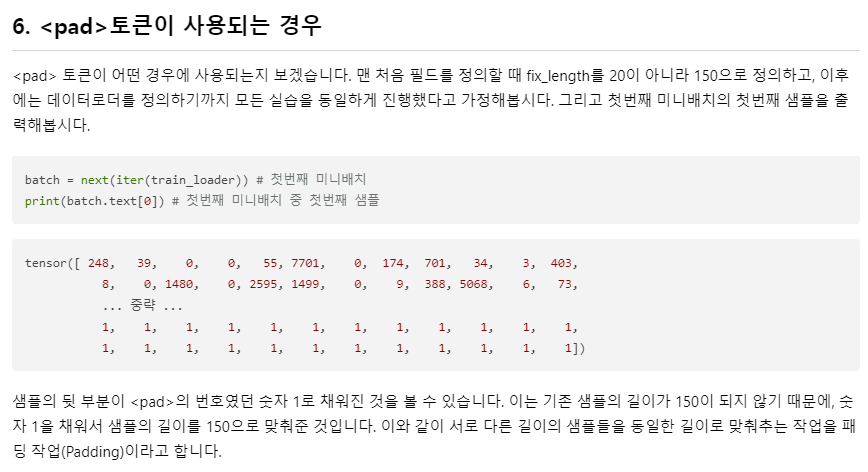